## 0. Setup

In [1]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

pt.update_plot_defaults()

In [2]:
# Load dataset
n_samples = 400
X,y = datasets.make_moons(n_samples=n_samples, shuffle=True, noise=0.1, random_state=42)
# X,y = datasets.make_circles(n_samples=n_samples, shuffle=True, noise=0.1, factor=0.2, random_state=42)
# X,y = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=2, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
                   
# Add index to train & test data
train_dataset = []
for i in range(len(y_train)):
    data = torch.tensor(X_train[i]).type(torch.float32)
    target = torch.tensor(y_train[i]).type(torch.float32).unsqueeze(0)
    train_dataset.append((i, data, target))

test_dataset = []
for i in range(len(y_test)):
    data = torch.tensor(X_test[i]).type(torch.float32)
    target = torch.tensor(y_test[i]).type(torch.float32).unsqueeze(0)
    test_dataset.append((i, data, target))    
    
# Put data in dataloader
data_generator = torch.Generator()
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, generator=data_generator)
train_dataloader_onebatch = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

epochs = 30
data_seed = 0
network_seed = 42

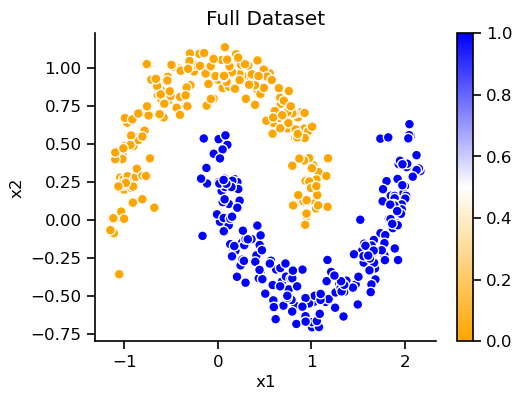

In [3]:
plt.figure(figsize=(5.5,4))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["orange", "white", "blue"])
plt.scatter(X[:,0], X[:,1], 50, edgecolors='w', c=y, cmap=cmap, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Full Dataset')
plt.show()

### Backprop (no weight contraints)

In [4]:
# Create network
network_config = ut.read_from_yaml('../config/binary_classification/EIANN_1_hidden_binary_backprop_relu_SGD_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

# Train network
data_generator.manual_seed(data_seed)
bp_network.train(train_dataloader,
                 epochs=epochs, 
                 store_history=False,
                 store_params=True,
                 status_bar=True)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:210: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


  0%|          | 0/601 [00:00<?, ?it/s]

Test Accuracy 100.0 %


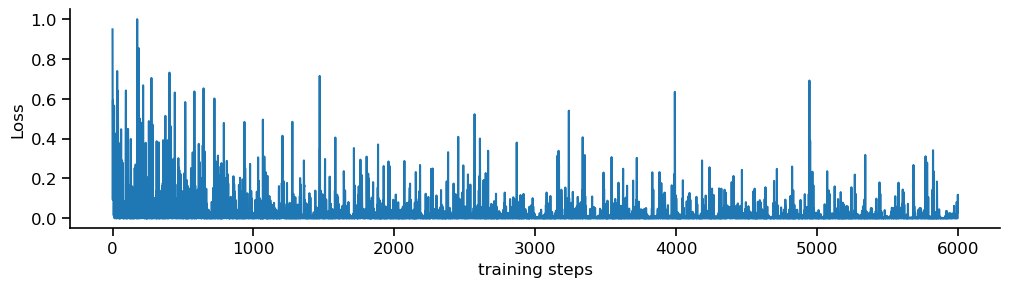

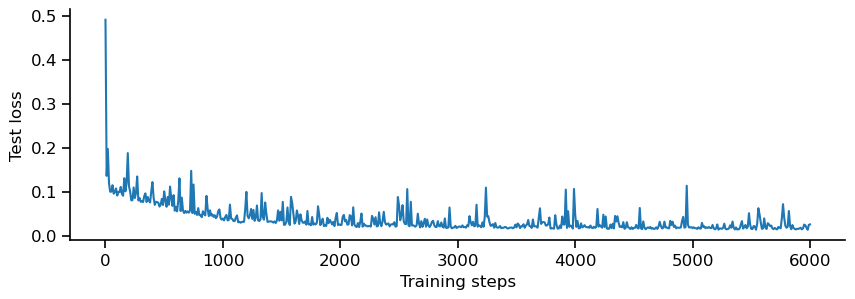

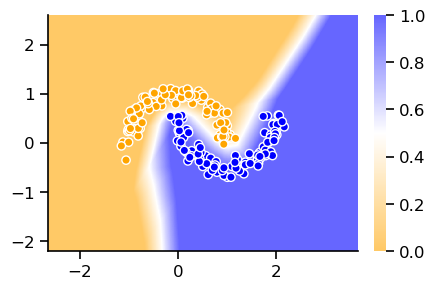

In [5]:
pt.plot_train_loss_history(bp_network)
pt.plot_test_loss_history(bp_network, test_dataloader, stepsize=10)
pt.plot_binary_decision_boundary(bp_network, test_dataloader, hard_boundary=False)

### Backprop (Dale's Law)

In [6]:
# Create network
network_config = ut.read_from_yaml('../config/binary_classification/EIANN_1_hidden_binary_backprop_Dale_relu_SGD_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bpDale_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

# Train network
data_generator.manual_seed(data_seed)
bpDale_network.train(train_dataloader, 
              epochs=epochs, 
              store_history=True,
              store_params=True,
              status_bar=True)


/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

Test Accuracy 99.5 %


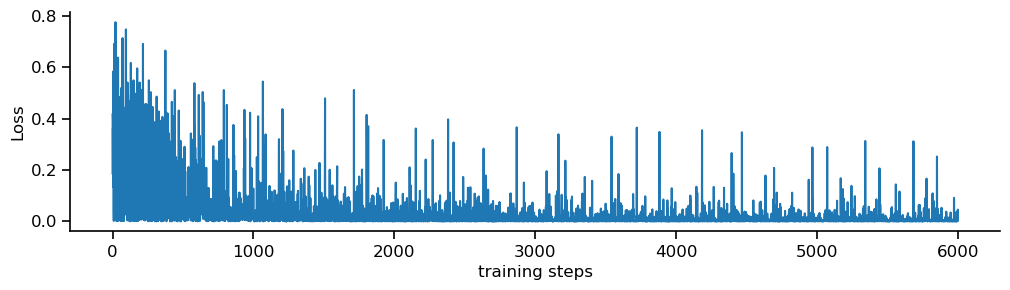

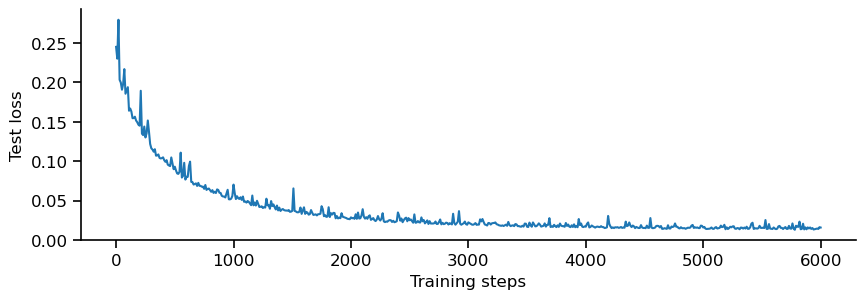

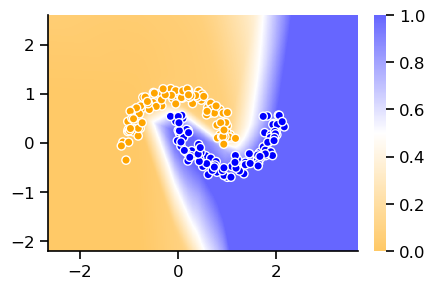

In [7]:
pt.plot_train_loss_history(bpDale_network)
pt.plot_test_loss_history(bpDale_network, test_dataloader, stepsize=10)
pt.plot_binary_decision_boundary(bpDale_network, test_dataloader, hard_boundary=False)

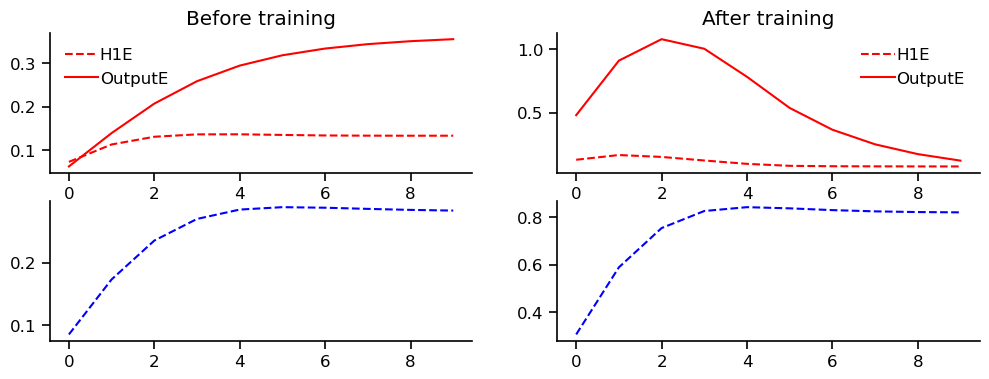

In [8]:
from EIANN.plot import *

fig,ax = plt.subplots(2,2,figsize=(12,4))

t = 0
hidden_activity = torch.mean(bpDale_network.H1.E.activity_history[t], dim=1)
output_activity = torch.mean(bpDale_network.Output.E.activity_history[t], dim=1)
ax[0,0].plot(hidden_activity,'--',color='r', label='H1E')
ax[0,0].plot(output_activity,color='r', label='OutputE')
ax[0,0].set_title('Before training')
ax[0,0].legend()

hiddenFBI_activity = torch.mean(bpDale_network.H1.FBI.activity_history[t], dim=1)
outputFBI_activity = torch.mean(bpDale_network.Output.FBI.activity_history[t], dim=1)
ax[1,0].plot(hiddenFBI_activity,'--',color='b', label='H1FBI')
ax[1,0].plot(outputFBI_activity,color='b', label='OutputFBI')


t = -1
hidden_activity = torch.mean(bpDale_network.H1.E.activity_history[t], dim=1)
output_activity = torch.mean(bpDale_network.Output.E.activity_history[t], dim=1)
ax[0,1].plot(hidden_activity,'--',color='r', label='H1E')
ax[0,1].plot(output_activity,color='r', label='OutputE')
ax[0,1].set_title('After training')
ax[0,1].legend()

hiddenFBI_activity = torch.mean(bpDale_network.H1.FBI.activity_history[t], dim=1)
outputFBI_activity = torch.mean(bpDale_network.Output.FBI.activity_history[t], dim=1)
ax[1,1].plot(hiddenFBI_activity,'--',color='b', label='H1FBI')
ax[1,1].plot(outputFBI_activity,color='b', label='OutputFBI')

plt.show()

## BTSP

In [9]:
# Create network
network_config = ut.read_from_yaml('../config/binary_classification/EIANN_1_hidden_binary_BTSP_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)


# Train network
data_generator.manual_seed(data_seed)
btsp_network.train(train_dataloader, 
                   epochs=epochs, 
                   store_history=False, 
                   store_params=True, 
                   status_bar=True)


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

Samples:   0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

Test Accuracy 65.5 %


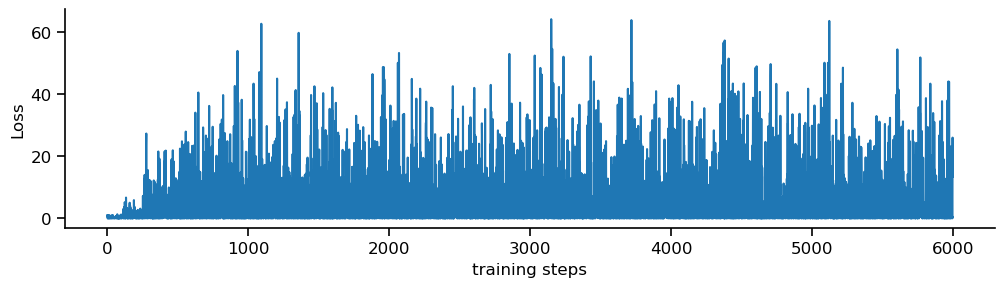

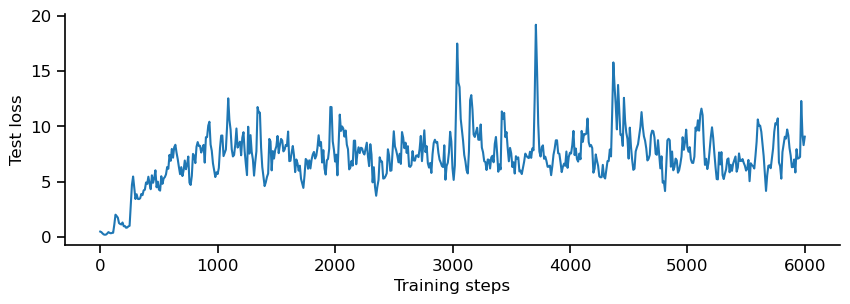

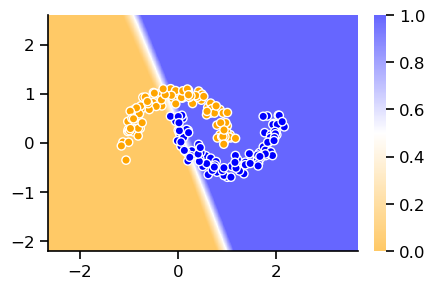

In [10]:
pt.plot_train_loss_history(btsp_network)
pt.plot_test_loss_history(btsp_network, test_dataloader, stepsize=10)
pt.plot_binary_decision_boundary(btsp_network, test_dataloader, hard_boundary=False)